In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
# Read the csv file 
df_movie = pd.read_csv('movies.csv')
df_movie.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# All columns name 
df_movie.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [4]:
# Information about data and dtype
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


# Data Cleaning

In [5]:
# find the number of the different characteristic and number of values
df_movie.shape

(7668, 15)

In [6]:
# Find missing/null values in dataset

for col in df_movie.columns:
    missing_values = np.mean(df_movie[col].isnull())
    print('{} :- {}%'.format(col,round(missing_values * 100)))

name :- 0%
rating :- 1%
genre :- 0%
year :- 0%
released :- 0%
score :- 0%
votes :- 0%
director :- 0%
writer :- 0%
star :- 0%
country :- 0%
budget :- 28%
gross :- 2%
company :- 0%
runtime :- 0%


In [7]:
# drop the all null values
df = df_movie.dropna()

In [8]:
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [9]:
# Change the data type of budget, gross and vote to int64

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

df

<ipython-input-9-afc110501958>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'] = df['budget'].astype('int64')
<ipython-input-9-afc110501958>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gross'] = df['gross'].astype('int64')
<ipython-input-9-afc110501958>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [10]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [11]:
# Split the released column in one new column is released country and year column already in dataset

df[['release_date', 'release_country']] = df['released'].astype(str).str.split("(", expand = True)
df['release_date'] = df['release_date'].str[:-1]
df['release_country'] = df['release_country'].str[:-1]
df

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-11-afedc96da54c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'] = df['release_date'].str[:-1]
<ipython-input-11-afedc96da54c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,"January 17, 2020",United States
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,"February 14, 2020",United States
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,"January 17, 2020",United States
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,"February 21, 2020",United States


In [12]:
#seprate date and year from release_date column

df[['release_date', 'release_year']] = df['release_date'].astype(str).str.split(", ", expand = True)
df

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June 13,United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,United States,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,January 17,United States,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,February 14,United States,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,January 17,United States,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,February 21,United States,2020


In [13]:
df.drop(columns='released',inplace=True)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
# Drop the duplicates
df.drop_duplicates()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June 13,United States,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,United States,1980
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,United States,1980
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,January 17,United States,2020
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,February 14,United States,2020
7650,Dolittle,PG,Adventure,2020,5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,January 17,United States,2020
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,February 21,United States,2020


# Finding Correlation

In [15]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


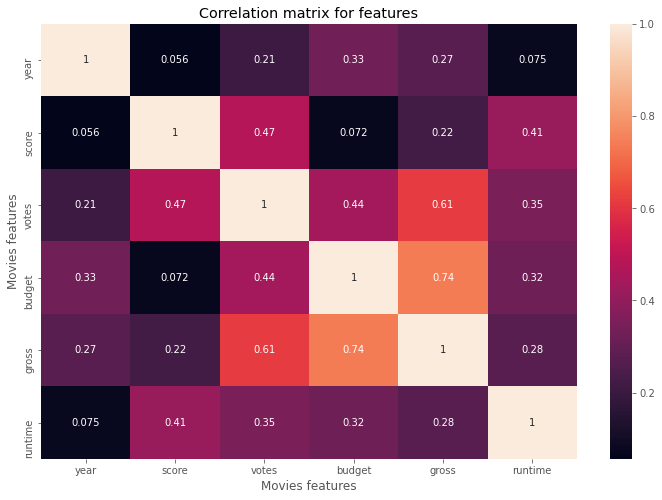

In [16]:
correlation_confusion_matrix = df.corr()
sns.heatmap(correlation_confusion_matrix,annot=True)
plt.title('Correlation matrix for features')
plt.xlabel('Movies features')
plt.ylabel('Movies features')
plt.show()

Changing the categorical features into categories and replacing with an integer values for distinct category.
We assumed the company name would have a significant impact on revenue, let's see if that is true. We should also numerize other string type columns along with Company Name while we numerize the strings. After that, we will also be able to look into other factors besides Company Data.

In [17]:
df_int = df.copy()
for col in df_int.columns:
    if(df_int[col].dtype == 'object'):
        df_int[col] = df_int[col].astype('category')
        df_int[col] = df_int[col].cat.codes

df_int.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
0,4692,6,6,1980,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0,193,47,0
1,3929,6,1,1980,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0,169,47,0
2,3641,4,0,1980,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0,201,47,0
3,204,4,4,1980,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0,169,47,0
4,732,6,4,1980,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0,175,47,0


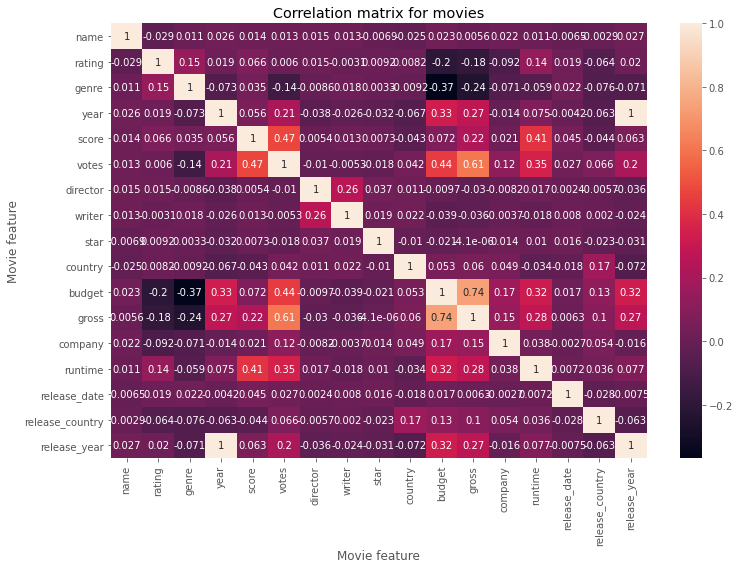

In [18]:
# Apply pearson correlation method and plot heatmap
correlation_matrix = df_int.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation matrix for movies')
plt.xlabel('Movie feature')
plt.ylabel('Movie feature')
plt.show()

In [19]:
correlation_pairs = correlation_matrix.unstack()
correlation_pairs

name          name               1.000000
              rating            -0.029234
              genre              0.010996
              year               0.025542
              score              0.014450
                                   ...   
release_year  company           -0.015587
              runtime            0.076666
              release_date      -0.007535
              release_country   -0.062715
              release_year       1.000000
Length: 289, dtype: float64

In [20]:
#pd.set_option('display.max_rows',None)

In [21]:
sort_pairs = correlation_pairs.sort_values()
sort_pairs

genre            budget            -0.368523
budget           genre             -0.368523
genre            gross             -0.244101
gross            genre             -0.244101
rating           budget            -0.203946
                                      ...   
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
release_country  release_country    1.000000
release_year     release_year       1.000000
Length: 289, dtype: float64

(0.0, 2000000000.0)

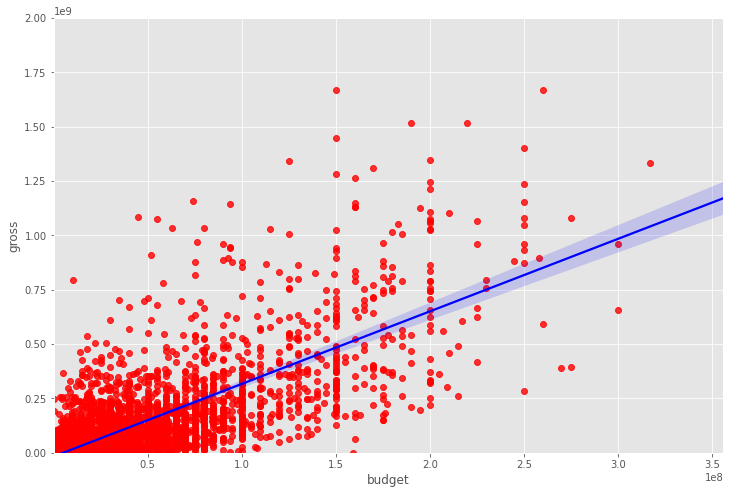

In [22]:
#budget vs gross (Regressionplot)
sns.regplot(x='budget', y='gross', data = df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.ylim([0,2*10**9])

The correlation between budget and genre is low, while the correlation between gross and votes/budget is high also, the company brandings have no correlation with the revnue.



# Exploratory Data Analysis

In [23]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June 13,United States,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,United States,1980
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,United States,1980
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,United States,1980


In [24]:
# Top Movies with high budgets
df.sort_values(by='budget',ascending=False).head(5)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,April 26,United States,2019
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,April 27,United States,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0,December 15,United States,2017
7066,Justice League,PG-13,Action,2017,6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0,November 17,United States,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0,May 25,United States,2007


In [25]:
df.sort_values(by='gross',ascending=False).head(5)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,December 18,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,April 26,United States,2019
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,December 19,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,December 18,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,April 27,United States,2018


In [26]:
# Top most profitable movies

df['revenue'] = df['gross'] - df['budget']
df.sort_values(by='revenue',ascending=False).head(10)

<ipython-input-26-5270a4c36083>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'] = df['gross'] - df['budget']


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year,revenue
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,December 18,United States,2009,2610246203
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,April 26,United States,2019,2441501328
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,December 19,United States,1997,2001647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,December 18,United States,2015,1824521700
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,April 27,United States,2018,1727359754
6653,Jurassic World,PG-13,Action,2015,7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,June 12,United States,2015,1520516444
7480,The Lion King,PG,Animation,2019,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,July 19,United States,2019,1410727580
6646,Furious 7,PG-13,Action,2015,7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,April 3,United States,2015,1325341399
7494,Frozen II,PG,Animation,2019,6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,November 22,United States,2019,1300026933
6043,The Avengers,PG-13,Action,2012,8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,May 4,United States,2012,1298815515


Revenue by the genre of movies thrugh year

Text(738.975, 0.5, 'Revenue in billion US dollars')

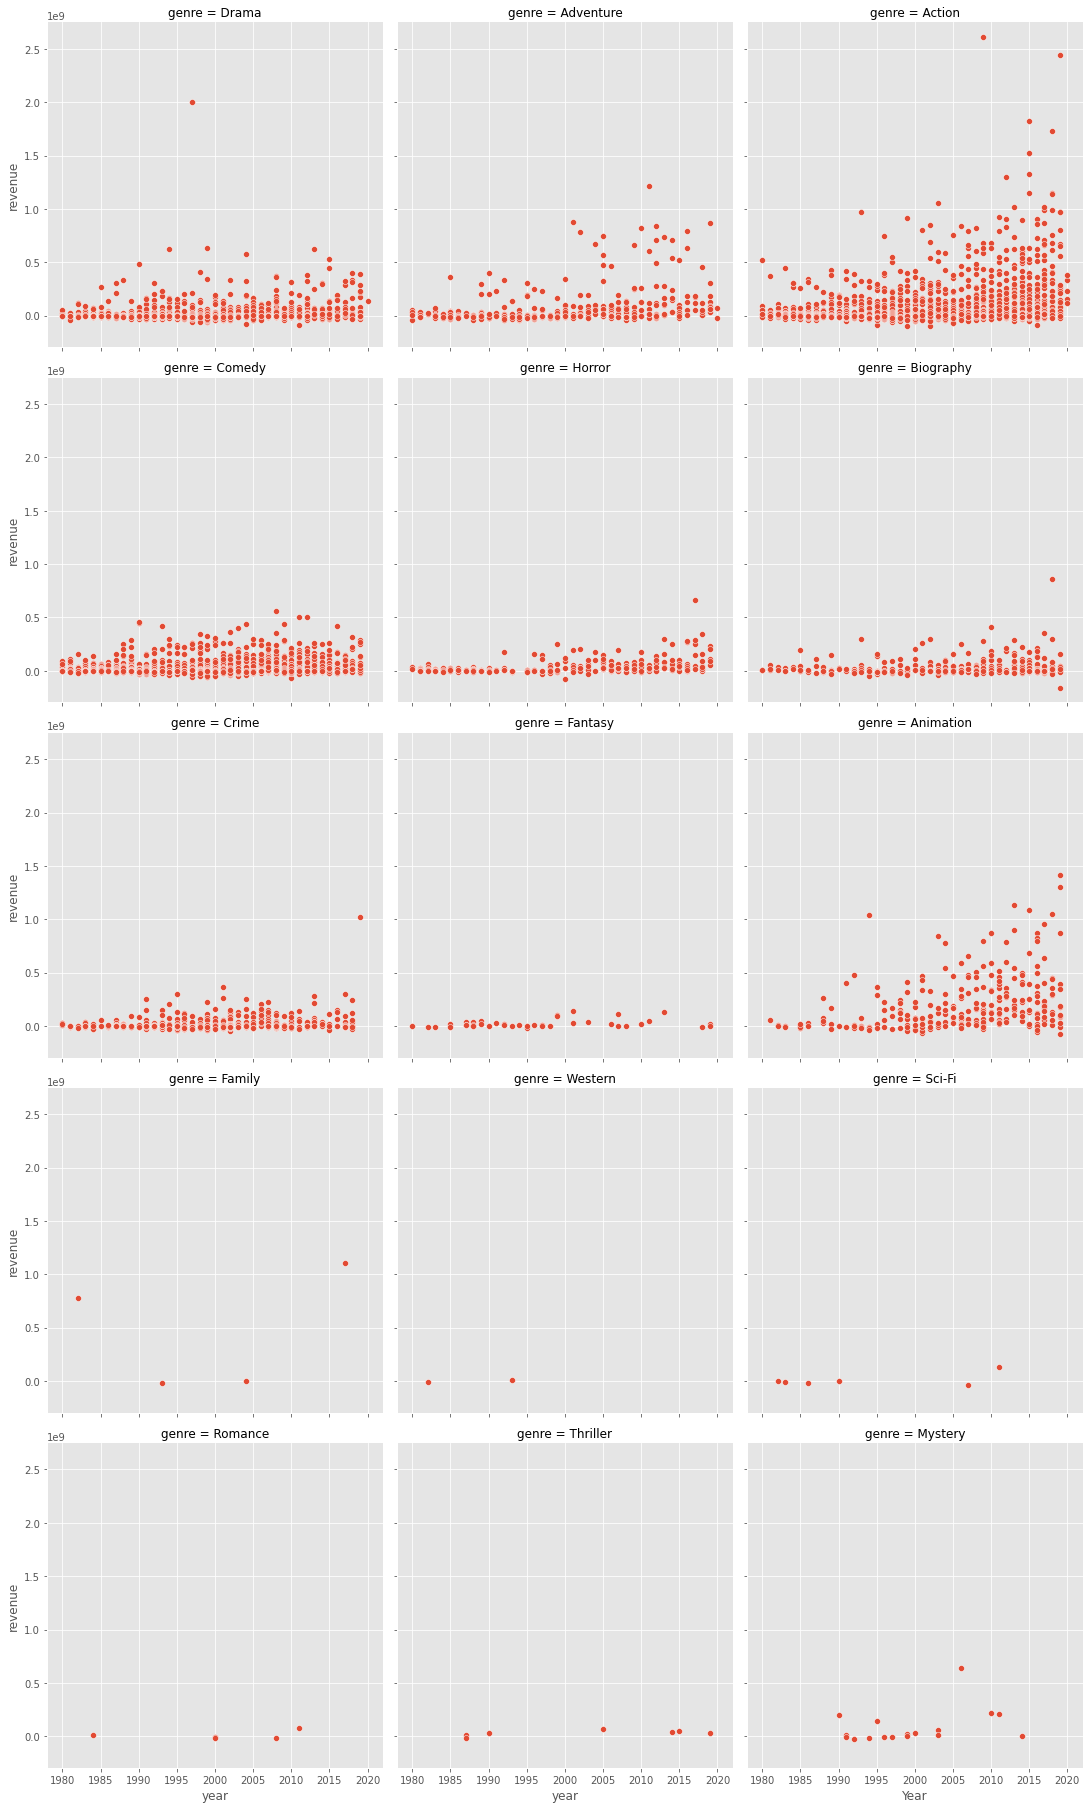

In [27]:
sns.relplot(data=df,x='year',y='revenue',col='genre',col_wrap=3)
plt.xlabel('Year')
plt.ylabel('Revenue in billion US dollars')

How many movies produced between 1980 to 2020

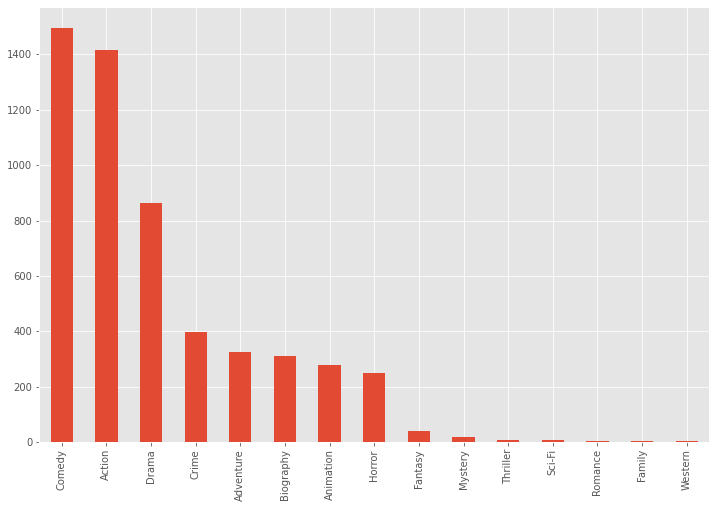

In [28]:
df_genre = df['genre'].value_counts().plot(kind='bar')

Action movies are most profitable but producers make more comedy movies. Maybe comedy movies require less money then action movies.

In [29]:
print("Average comedy movies budgets :",df[df.genre == 'Comedy']['budget'].mean())

Average comedy movies budgets : 22802371.80147059


In [30]:
print("Average Action movies budgets :",df[df.genre == 'Action']['budget'].mean())

Average Action movies budgets : 58468560.472084805


This Assumption is right Action movies require more money than comedy

In this statistic, we are going to look at the average percentage-based profit for movies by genre, calculated by dividing the total number of movies in that particular genre by total revenue.

In [31]:
action=df.loc[df['genre']=='Action']
per_act_pro=round(100*action.loc[action['revenue']>0].size/action.size)
print('Percentage of profitable action movies: ',per_act_pro,'%')

com=df.loc[df['genre']=='Comedy']
per_com_pro=round(100*com.loc[com['revenue']>0].size/com.size)
print('Percentage of profitable comedies: ',per_com_pro,'%')

dra=df.loc[df['genre']=='Drama']
per_dra_pro=round(100*dra.loc[dra['revenue']>0].size/dra.size)
print('Percentage of profitable dramas: ',per_dra_pro,'%')

cri=df.loc[df['genre']=='Crime']
per_cri_pro=round(100*cri.loc[cri['revenue']>0].size/cri.size)
print('Percentage of profitable crime movies: ',per_cri_pro,'%')

adv=df.loc[df['genre']=='Adventure']
per_adv_pro=round(100*adv.loc[adv['revenue']>0].size/adv.size)
print('Percentage of profitable adventure movies: ',per_adv_pro,'%')

bio=df.loc[df['genre']=='Biography']
per_bio_pro=round(100*bio.loc[bio['revenue']>0].size/bio.size)
print('Percentage of profitable biography movies: ',per_bio_pro,'%')

ani=df.loc[df['genre']=='Animation']
per_ani_pro=round(100*ani.loc[ani['revenue']>0].size/ani.size)
print('Percentage of profitable animation movies: ',per_ani_pro,'%')

hor=df.loc[df['genre']=='Horror']
per_hor_pro=round(100*hor.loc[hor['revenue']>0].size/hor.size)
print('Percentage of profitable dramas: ',per_hor_pro,'%')

fan=df.loc[df['genre']=='Fantasy']
per_fan_pro=round(100*fan.loc[fan['revenue']>0].size/fan.size)
print('Percentage of profitable fantasy movies: ',per_fan_pro,'%')

mys=df.loc[df['genre']=='Mystery']
per_mys_pro=round(100*mys.loc[mys['revenue']>0].size/mys.size)
print('Percentage of profitable mystery movies: ',per_mys_pro,'%')

thri=df.loc[df['genre']=='Thriller']
per_thri_pro=round(100*thri.loc[thri['revenue']>0].size/thri.size)
print('Percentage of profitable mystery thrillers: ',per_thri_pro,'%')

sci=df.loc[df['genre']=='Sci-Fi']
per_sci_pro=round(100*sci.loc[sci['revenue']>0].size/sci.size)
print('Percentage of profitable Sci-Fi movies: ',per_sci_pro,'%')

rom=df.loc[df['genre']=='Romance']
per_rom_pro=round(100*rom.loc[rom['revenue']>0].size/rom.size)
print('Percentage of profitable romance movies: ',per_rom_pro,'%')

fam=df.loc[df['genre']=='Family']
per_fam_pro=round(100*fam.loc[fam['revenue']>0].size/fam.size)
print('Percentage of profitable family movies: ',per_fam_pro,'%')

west=df.loc[df['genre']=='Western']
per_west_pro=round(100*west.loc[west['revenue']>0].size/west.size)
print('Percentage of profitable western movies: ',per_west_pro,'%')

Percentage of profitable action movies:  73 %
Percentage of profitable comedies:  67 %
Percentage of profitable dramas:  60 %
Percentage of profitable crime movies:  56 %
Percentage of profitable adventure movies:  66 %
Percentage of profitable biography movies:  64 %
Percentage of profitable animation movies:  84 %
Percentage of profitable dramas:  80 %
Percentage of profitable fantasy movies:  71 %
Percentage of profitable mystery movies:  65 %
Percentage of profitable mystery thrillers:  86 %
Percentage of profitable Sci-Fi movies:  33 %
Percentage of profitable romance movies:  40 %
Percentage of profitable family movies:  50 %
Percentage of profitable western movies:  50 %


In [32]:
#df.drop(columns='parent_company',inplace=True)

In [33]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year,revenue
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June 13,United States,1980,27998772
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,United States,1980,54353106
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,United States,1980,520375067
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,United States,1980,79953539
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,United States,1980,33846344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,January 17,United States,2020,336505244
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,February 14,United States,2020,234715683
7650,Dolittle,PG,Adventure,2020,5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,January 17,United States,2020,70487753
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,February 21,United States,2020,-23894503


Text(0.5, 1.0, 'Movies Count of Each Year')

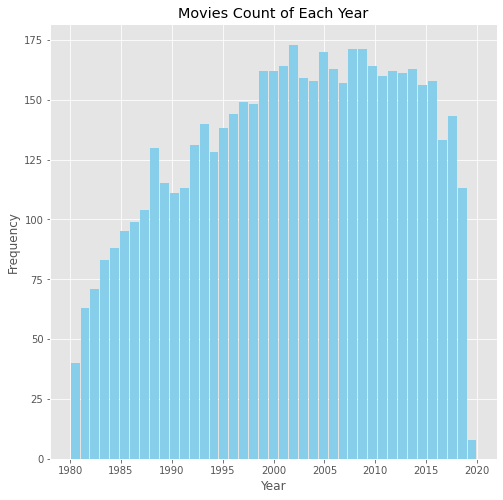

In [34]:
#plot a histogram of movie count vs year, from 1980 to 2020

fig,ax=plt.subplots(figsize=(8,8))
plt.hist(df["year"],bins=41,rwidth=0.9, color = "skyblue")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.title("Movies Count of Each Year")

The movie industry has been growing since 1980, but topped off at about 2010, and started to decline since. It might by due to the pervasiveness of smart phones, social media, and priracy.

Movie count dropped a lot in 2020. It might be due to the start of COVID-19 Pandemic in year 2020.

In [35]:
#Let us look at the lowest IMDB score movies and highest IMBD score movies
minimim_score = df[df['score'] == df['score'].min()]
minimim_score[['year','name','score','budget','revenue']]

,year,name,score,budget,revenue
4594,2004,Superbabies: Baby Geniuses 2,1.9,20000000,-10551356
5306,2008,Disaster Movie,1.9,20000000,14816824


In [36]:
minimim_score = df[df['score'] == df['score'].max()]
minimim_score[['year','name','score','budget','revenue']]

,year,name,score,budget,revenue
2443,1994,The Shawshank Redemption,9.3,25000000,3817291


Next we take a look at the general qualities of the movies, measure by "score"

<Figure size 864x1080 with 0 Axes>

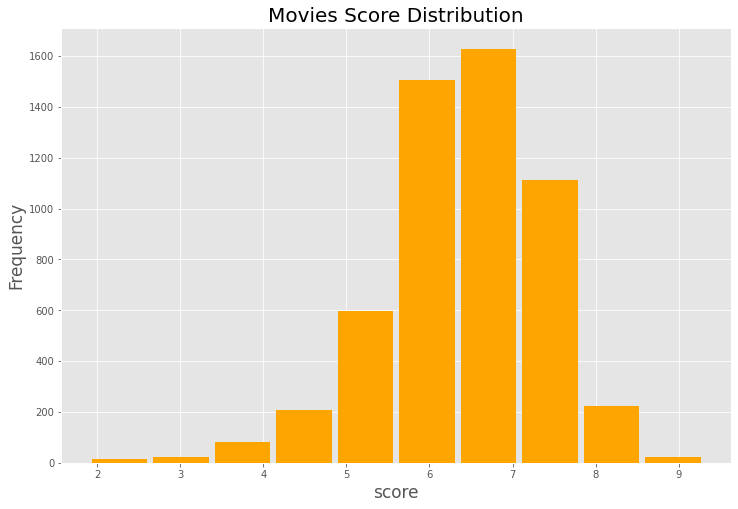

<Figure size 864x1080 with 0 Axes>

In [37]:
plt.hist(df["score"],range=(1.9,9.3), color='orange', rwidth=0.9)
plt.ylabel("Frequency",fontsize=17)
plt.xlabel("score",fontsize=17)
plt.title("Movies Score Distribution",fontsize=20)
plt.figure(figsize=(12,15))

Let us look at the top production companies in terms of their profit. Here we consider both profit and loss
First we take a look at movies in the 20th Century, i.e. years 1980 to 1999.

In [38]:
df_company_twentyCentury= df.loc[ df['year'].between(1980,1999), ['year', 'name', 'genre', 'company', 'revenue']  ] 
df_company_twentyCentury

,year,name,genre,company,revenue
0,1980,The Shining,Drama,Warner Bros.,27998772
1,1980,The Blue Lagoon,Adventure,Columbia Pictures,54353106
2,1980,Star Wars: Episode V - The Empire Strikes Back,Action,Lucasfilm,520375067
3,1980,Airplane!,Comedy,Paramount Pictures,79953539
4,1980,Caddyshack,Comedy,Orion Pictures,33846344
...,...,...,...,...,...
3631,1999,The Loss of Sexual Innocence,Drama,Newmarket Capital Group,-3835978
3633,1999,The Out-of-Towners,Comedy,Cherry Alley Productions,-46455880
3638,1999,The King and I,Animation,Morgan Creek Entertainment,-13006979
3639,1999,Jesus' Son,Drama,Evenstar Films,-1197933


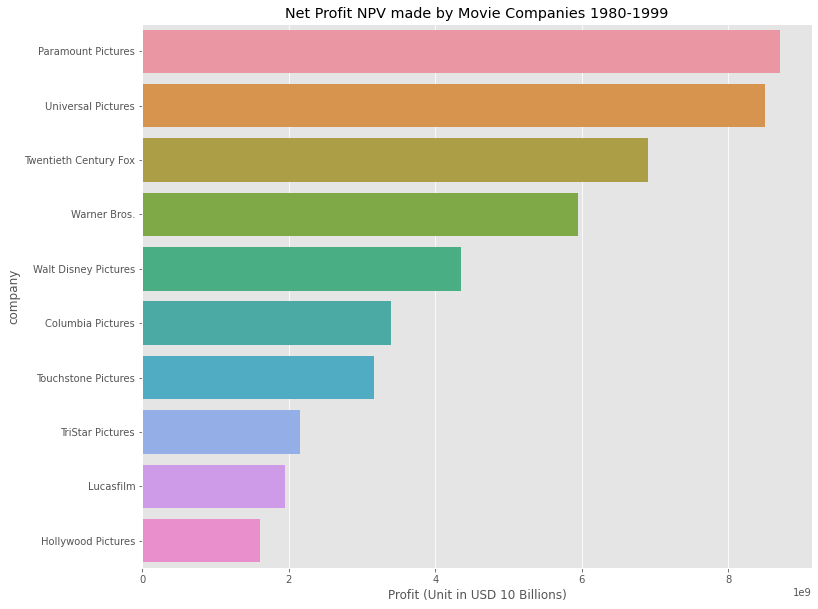

In [39]:
plt.figure(figsize=(12,10))
df_company_twentyCentury = df_company_twentyCentury.groupby("company")['revenue'].sum()
df_company_twentyCentury = df_company_twentyCentury.reset_index().sort_values("revenue", ascending=False)
sns.barplot(x = 'revenue', y = 'company', data = df_company_twentyCentury[:10])
plt.title("Net Profit NPV made by Movie Companies 1980-1999")
plt.xlabel("Profit (Unit in USD 10 Billions)")
plt.show()

Next we take a look at movies in the second decade of the 21th Century, i.e. years 2010 to 2019, before the COVID-19 Pandemic starting year 2020.

In [44]:
df_company_21Century= df.loc[df['year'].between(2010,2019), ['year', 'name', 'genre', 'rating' ,'company', 'revenue']]

df_company_21Century = df_company_21Century.copy() 



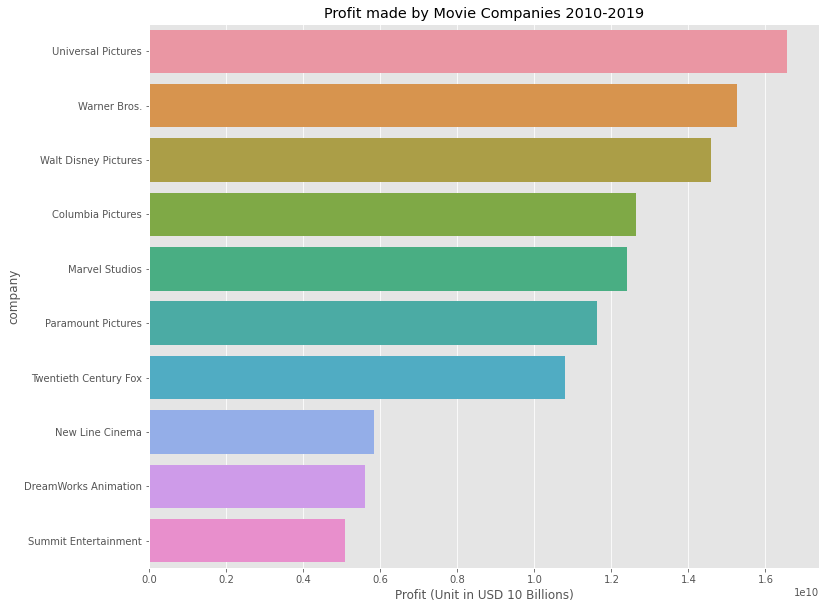

In [41]:
plt.figure(figsize=(12,10))
df_company_21Century = df_company_21Century.groupby("company")['revenue'].sum()
df_company_21Century = df_company_21Century.reset_index().sort_values("revenue", ascending=False)
sns.barplot(x = 'revenue', y = 'company', data = df_company_21Century[:10])
plt.title("Profit made by Movie Companies 2010-2019")
plt.xlabel("Profit (Unit in USD 10 Billions)")
plt.show()

From the above charts, Paramount Picture was the most profitable movie company in the last century, but in the last decade, its profitability has dropped a lot.

On the other hand, Walt Disney Pictures has moved up in the ranking, and both Universal Pictures and Warner Brothers remain in the top three.

Text(0.5, 1.0, 'Movies Rating Frequency')

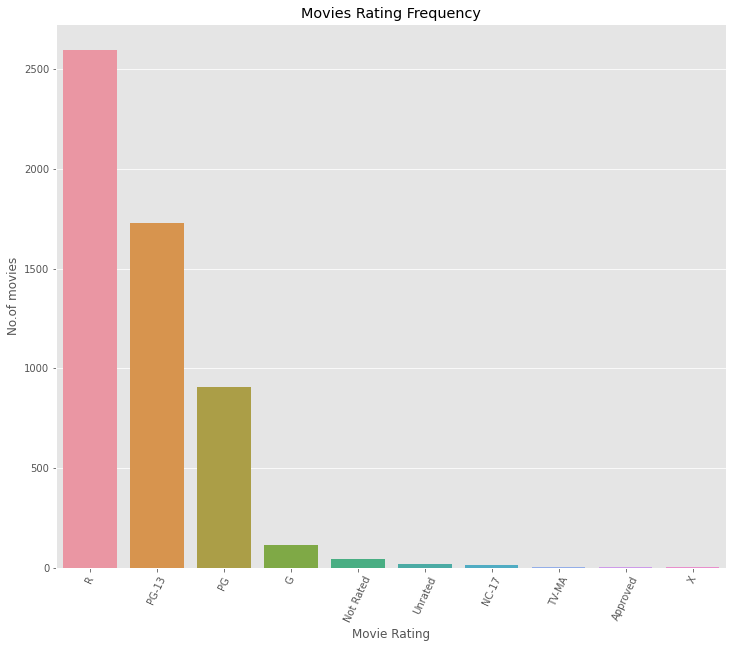

In [42]:
plt.figure(figsize=(12,10))
sns.countplot(data=df,x="rating",order=df["rating"].value_counts().index)

plt.xticks(rotation=65)

plt.xlabel("Movie Rating")
plt.ylabel("No.of movies")
plt.title("Movies Rating Frequency")

The top Movie ratings by movie count, are "R" Restricted, "PG-13" Parent Guided 13-yrs-old, and "PG" Parent Guided 17-yrs-old.

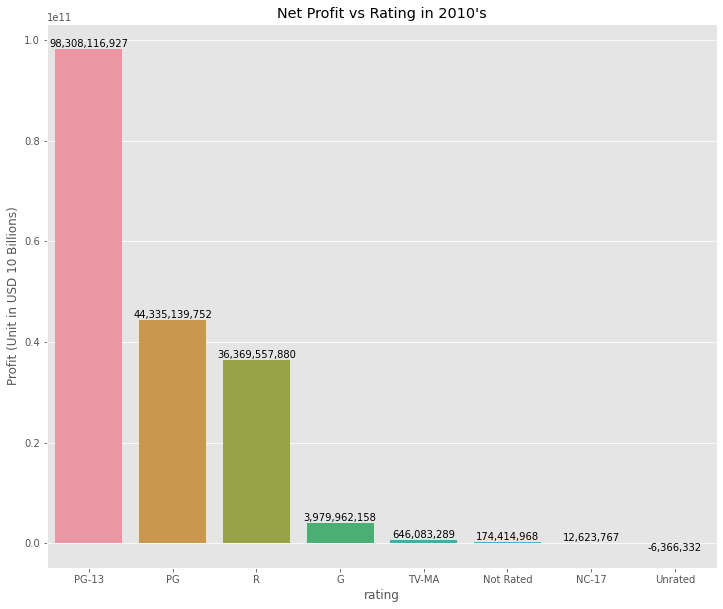

In [50]:
# use above saved dataframe of df_company_21Century
plt.figure(figsize=(12,10))
df_company_21Century = df_company_21Century.groupby('rating')['revenue'].sum()
df_company_21Century = df_company_21Century.reset_index().sort_values('revenue', ascending=False)
ax = sns.barplot(x = 'rating', y = 'revenue', data = df_company_21Century[:10])
plt.title("Net Profit vs Rating in 2010's")
plt.ylabel("Profit (Unit in USD 10 Billions)")

container = ax.containers[0]
ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])

plt.show()

In the 2010's, movies of rating suitable for family and for children/teenagers, are more profitable, than movies limited to adults.